In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_walking=pd.read_csv('Dataset FOr HAR.csv')

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


In [3]:
df_walking.head()

,timeElapsed,x,y,z,label
0,0.000,0.413040,0.878448,0.026169,standToSit1
1,0.100,0.462570,0.758789,0.313019,standToSit1
2,0.199,0.546524,0.559891,0.594940,standToSit1
3,0.299,0.348984,0.484650,0.514313,standToSit1
4,0.398,0.515930,0.342545,0.696701,standToSit1


In [4]:
df_walking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timeElapsed  479 non-null    float64
 1   x            479 non-null    float64
 2   y            479 non-null    float64
 3   z            479 non-null    float64
 4   label        479 non-null    object 
dtypes: float64(4), object(1)
memory usage: 18.8+ KB


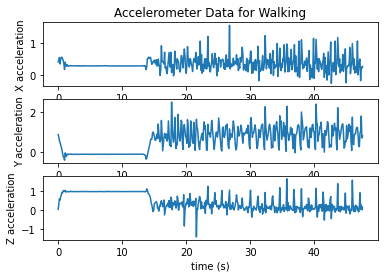

<Figure size 720x720 with 0 Axes>

In [5]:
plt.subplot(3, 1, 1)
plt.plot(df_walking['timeElapsed'],df_walking['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df_walking['timeElapsed'],df_walking['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df_walking['timeElapsed'],df_walking['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [6]:
X_sample= df_walking['x'].values
X_sample.shape

(479,)

In [7]:
a=0.05
S=list(X_sample)
X=[0]
for i in range(1,len(X_sample)):
  X.append((1-a)*X[i-1]+a*S[i]) 
print(len(X))

479


In [8]:
from scipy.signal import butter,filtfilt

In [9]:
T = 5.0         # Sample Period
fs = 30.0       # sample rate, Hz
cutoff = 2      # desired cutoff frequency of the filter, Hz ,      slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic
n = int(T * fs) # total number of samples

In [10]:
def Smoothing(S):
    Smoothed_signal= np.convolve(S, np.ones(S)/len(S), mode='valid') 
    return Smoothed_signal

In [11]:
Smoothing(X)

ValueError: maximum supported dimension for an ndarray is 32, found 479

In [14]:
x=butter_lowpass_filter(X,cutoff, fs, order)
y=butter_lowpass_filter(df_walking['y'],cutoff, fs, order)
z=butter_lowpass_filter(df_walking['z'],cutoff, fs, order)



NameError: name 'butter_lowpass_filter' is not defined

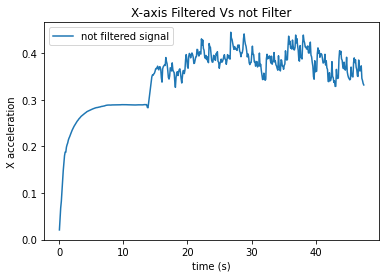

In [15]:

plt.plot(df_walking['timeElapsed'],X,label='not filtered signal')
#plt.plot(df_walking['timeElapsed'],x,label='filtered signal')
plt.title('X-axis Filtered Vs not Filter')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')
plt.legend()
plt.show()




NameError: name 'y' is not defined

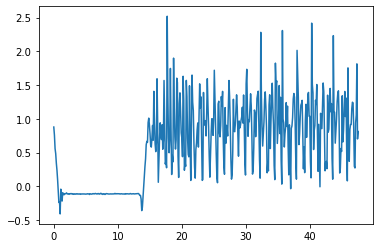

In [16]:

plt.plot(df_walking['timeElapsed'],df_walking['y'],label='not filtered signal')
plt.plot(df_walking['timeElapsed'],y,label='filtered signal')
plt.title('Y-axis Filtered Vs not Filter')
plt.ylabel('y acceleration')
plt.xlabel('time (s)')
plt.legend()
plt.show()

NameError: name 'z' is not defined

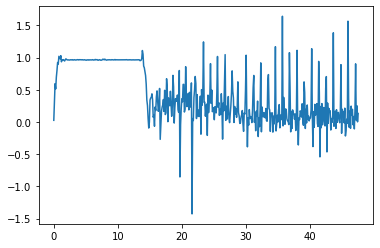

In [17]:

plt.plot(df_walking['timeElapsed'],df_walking['z'],label='not filtered signal')
plt.plot(df_walking['timeElapsed'],z,label='filtered signal')
plt.title('Z-axis Filtered Vs not Filter')
plt.ylabel('z acceleration')
plt.xlabel('time (s)')
plt.legend()
plt.show()

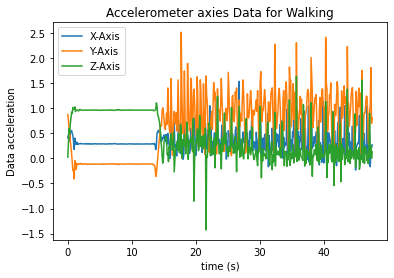

In [18]:
plt.plot(df_walking['timeElapsed'],df_walking['x'],label='X-Axis')
plt.plot(df_walking['timeElapsed'],df_walking['y'],label='Y-Axis')
plt.plot(df_walking['timeElapsed'],df_walking['z'],label='Z-Axis')
plt.title('Accelerometer axies Data for Walking')
plt.ylabel('Data acceleration')
plt.xlabel('time (s)')
plt.legend()
plt.show()

In [19]:
plt.plot(df_walking['timeElapsed'],x,label='X-Axis-filtered')
plt.plot(df_walking['timeElapsed'],y,label='Y-Axis-filtered')
plt.plot(df_walking['timeElapsed'],z,label='Z-Axis-filtered')
plt.title('Accelerometer axies Data for Walking')
plt.ylabel('Data acceleration')
plt.xlabel('time (s)')
plt.legend()
plt.show()

NameError: name 'x' is not defined

In [20]:
from scipy.signal import find_peaks

In [21]:
thresh_x = -0.12
thresh_y = 0.90
thresh_z = 0.15

In [22]:
peak_x, _ = find_peaks(x, height=thresh_x)
peak_y, _ = find_peaks(y, height=thresh_y )
peak_z, _ = find_peaks(z, height=thresh_z)

NameError: name 'x' is not defined

In [ ]:
peak_x

In [32]:
t=df_walking['timeElapsed']

In [33]:
plt.plot(df_walking['timeElapsed'],x,label='x-Axis')
plt.plot(t[peak_x], x[peak_x], 'r.')
plt.plot(t[peak_y], y[peak_y], 'r.')
plt.plot(df_walking['timeElapsed'],y,label='y-Axis')
plt.plot([min(t), max(t)], [thresh_y, thresh_y], '--',label='y_thresh')
plt.plot([min(t), max(t)], [thresh_x, thresh_x], '--',label='x_thresh')
plt.plot(df_walking['timeElapsed'],z,label='z-Axis')
plt.plot(t[peak_z], z[peak_z], 'r.')
plt.plot([min(t), max(t)], [thresh_z, thresh_z], '--',label='z_thresh')
plt.title('Accelerometer Peak Detection ')
plt.ylabel('Data acceleration')
plt.xlabel('time (s)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.figure(figsize=(8,8))
plt.show()

NameError: name 'x' is not defined

In [25]:
X_sample= df_walking['x'].values
a=0.05
S=list(X_sample)
X=[]
for i in range(0,len(X_sample)):
    if i==0:
        X.append(a*S[i]) 
    else:
        X.append((1-a)*X[i-1]+a*S[i]) 
        
  
print(len(X))

479


In [28]:
n = df_walking.shape[0]

In [31]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

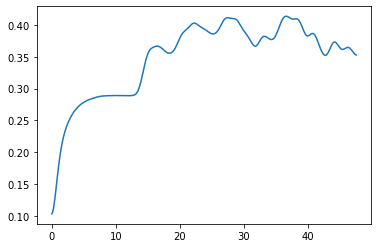

In [56]:
from scipy.ndimage import gaussian_filter1d
st = np.std(X)
X_smoothed = gaussian_filter1d(X, 6)
plt.plot(df_walking['timeElapsed'],X_smoothed)